# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [6]:
import numpy as np
import scipy.linalg as sla

In [7]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [8]:
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]

# Сделайте то же для тестовой выборки

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [9]:
def make_X (x, k):
    deg = k
    temp_mas = np.zeros((k+1, len(x)))
    for i in range(k+1):
        temp_mas[i] = (np.full(len(x), x**deg)).T
        deg -=1 
    return(temp_mas.T)

In [10]:
def make_caef(k):
    X = make_X(X_train, k)
    return ((np.dot(sla.inv(np.dot(X.T, X)), X.T)).dot(y_train.reshape(len(y_train), 1)))

In [11]:
X = np.concatenate((X_train.reshape(len(X_train), 1), np.ones(len(X_train)).reshape(len(X_train), 1)), axis=1)
caef = make_caef(1)
k, b = caef
print('f(x) =', k[0], '* x +', b[0])

f(x) = 2.2791344980519455 * x + 4.433230905064934


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

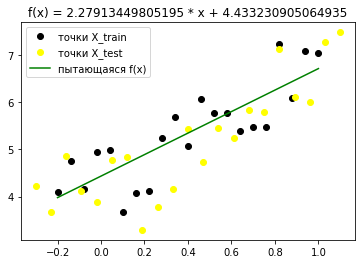

In [12]:
import matplotlib.pyplot as plt
result = []
for x in X_train:
    result.append(x * k + b) #заполняем result значениями f(x)
plt.title('f(x) = 2.27913449805195 * x + 4.433230905064935') #подписываем
plt.plot(X_train, y_train,'ro', color='black', label='точки X_train') #рисуемммм
plt.plot(X_test, y_test,'ro', color='yellow', label='точки X_test')
plt.plot(X_train, result, color='green', label='пытающаяся f(x)')
plt.legend()


Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [13]:
#функция для поиска среднеквадратической ошибки
def mistake(caef, y, X):
    sum = 0
    for i in range(len(X)):
        sum += ((X.dot(caef))[i] - y[i])**2
    return (sum[0] / len(X))

def mistake3(X, y, caef):
    mistakee = 0
    for i in range(len(X)):
        deg = 1
        res = 0
        for elem in caef:
            res += (elem * deg)
            deg *= X[i]
        mistakee += (res - y[i])**2
    return mistakee/len(X)

Найдем для $k = 1, 2, 3, ..., 10$ многочлены $\hat{f}_k$ степени $k$, наилучшим образом приближающие неизвестную зависимость и напечатаем коэффициенты полученных многочленов для $k = 1, ..., 4, 6$:

In [14]:
for k in range(1, 11):
    deg = k
    X = make_X(X_train, k)
    caef = make_caef(k)
    if (k < 7 and k != 5):
        print('k = ', k, ': f(x) = ', sep='', end='')
        for t in range(k):
            print(caef[t][0], ' * x', sep='', end='')
            if (deg != 1):
                print('^', deg, ' ', sep='', end='')
            if (caef[t+1][0] > 0):
                print(' + ', end='')
            deg -= 1
        print(caef[t+1][0])    

k = 1: f(x) = 2.2791344980519455 * x + 4.433230905064934
k = 2: f(x) = 1.4016285121152898 * x^2  + 1.157831688359715 * x + 4.472476503404164
k = 3: f(x) = -0.38176860428777787 * x^3  + 1.859750837260898 * x^2  + 1.0650161052852354 * x + 4.460736355285093
k = 4: f(x) = 7.918474697314239 * x^4 -13.051328119977338 * x^3  + 6.794091784353347 * x^2  + 1.171802392631903 * x + 4.341166120399721
k = 6: f(x) = -229.97013339244856 * x^6  + 581.4532981851046 * x^5 -481.51013283395633 * x^4  + 121.25709711826003 * x^3  + 16.002903989292612 * x^2 -4.597179324630047 * x + 4.383795011026809


Нарисуем  графики многочленов степеней $k = 1, ..., 4, 6$ на одном чертеже вместе с точками (X_train, y_train) и (X_test, y_test):

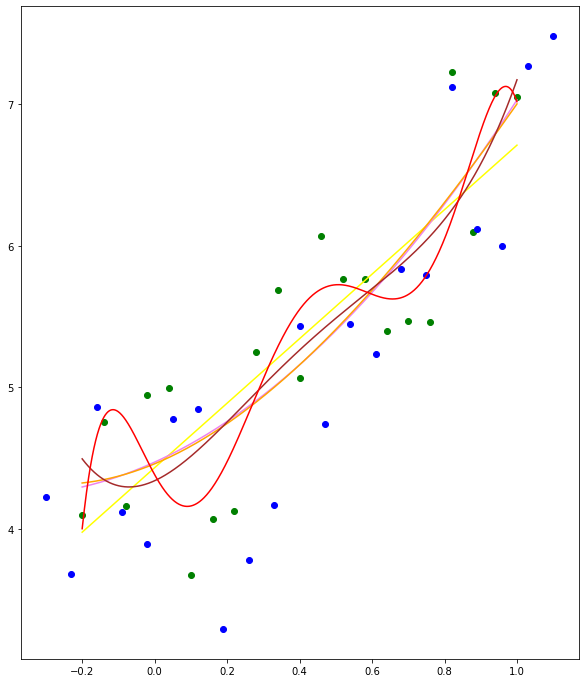

In [15]:
plt.figure(figsize=(10, 12)) #рисуемммм
plt.plot(X_train, y_train,'ro', color='green') #наносим точки
plt.plot(X_test, y_test,'ro', color='blue') #наносим точки
result = []
X_temp = np.linspace(-0.2, 1, 1000)
for k in range(1, 7):
    X = make_X(X_temp, k)
    caef = make_caef(k)
    result.append(X.dot(caef))
plt.plot(X_temp, result[0], color='yellow')
plt.plot(X_temp, result[1], color='violet')
plt.plot(X_temp, result[2], color='orange')
plt.plot(X_temp, result[3], color='brown')
plt.plot(X_temp, result[5], color='red')

Данную функцию лучше всего приблизить многочленом 20 степени. Построим график:

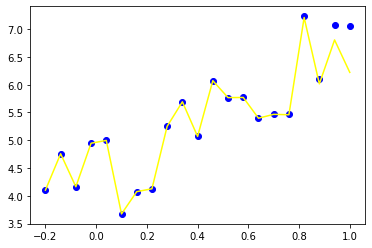

In [16]:
X_temp = np.linspace(-0.2, 1, 21)
X = make_X(X_temp, 20)
a = (sla.inv(X)).dot(y_train)
plt.plot(X_train, y_train,'ro', color='blue') #наносим точки
plt.plot(X_train, X.dot(a), color='yellow')

Найдем среднеквадратическую ошибку на обучающих данных:

In [17]:
for k in range(1, 11):
    X = make_X(X_train, k)
    caef = make_caef(k)
    print('k =', k, ':', mistake(caef, y_train, X))

k = 1 : 0.2968966332625196
k = 2 : 0.2696989158766914
k = 3 : 0.269497187147961
k = 4 : 0.2610665330579276
k = 5 : 0.24998504648317527
k = 6 : 0.18829348988370065
k = 7 : 0.18539621153294358
k = 8 : 0.1590555657909483
k = 9 : 0.15847184288205848
k = 10 : 0.15316621869681243


и на тестовых:

In [18]:
for k in range(1, 11):
    X = make_X(X_test, k)
    caef = make_caef(k)
    print('k =', k, ':', mistake(caef, y_test, X))

k = 1 : 0.43512020040488736
k = 2 : 0.3564762887831221
k = 3 : 0.35534645715185986
k = 4 : 0.4417270189296409
k = 5 : 0.5579732021773802
k = 6 : 2.5816929291416026
k = 7 : 2.5157828971534046
k = 8 : 4.357289502248264
k = 9 : 4.776416407376189
k = 10 : 14.634558480491464


Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

Ошибка при росте многочлена возрастает при $k \geq 3$ на тестовых данных (и ошибка минимальна при $k = 3$ на тестовых данных) и убывает при $k \geq 1$ на обучающих данных. Заметим, что при $k = 10$ ошибка на тестовых данных становится максимальной, а на обучающих наоборот минимальной. Это происходит из-за переобучения (как было сказано выше). Чем выше оказывается степень $k$, тем больше многочлен "приближается" к обучающим данным, но не тестовым.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

Запишем данные:

In [19]:
flats_moscow = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
price = flats_moscow[:, 0]
totsp = flats_moscow[:, 1]
livesp = flats_moscow[:, 2]
kitsp = flats_moscow[:, 3]
dist = flats_moscow[:, 4]
metrdist = flats_moscow[:, 5]

In [20]:
def make_caef_(X, y):
    return ((np.dot(sla.inv(np.dot(X.T, X)), X.T)).dot(y.reshape(len(y), 1)))

Составим матрицу $X$ (аналогична матрице flats_moscow, но без первого столбца):

In [21]:
X = np.concatenate((flats_moscow[:, 1:], np.ones(len(price)).reshape(len(price), 1)), axis=1)

В качестве $y$ будет price. Тогда можем получить оценки коэффициентов $\hat{a}$:

In [22]:
caef = make_caef_(X, price.reshape(len(price), 1)).reshape(6)
print(caef)

[  1.48705289   1.656289     1.81920498  -3.32715406  -1.3156886
 -26.78926963]


Вычислим среднеквадратическую ошибку:

In [23]:
def mistake1(caef, y, X):
    sum = 0
    for i in range(len(X)):
        sum += ((X.dot(caef))[i] - y[i])**2
    return (sum / len(X))
print(mistake1(caef, price, X))

924.0090032084005


Если знак регресионного коэффициента положителен, то цена на квартиру растет, если растет соответствующая характеристика. Если знак отрицателен, то цена растет, если  характеристика уменьшается. 

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [24]:
import sklearn as sk
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.40, random_state=25)

In [25]:
X_test_copy = X_test.transpose()
X_train_copy = X_train.transpose()
totsp = X_test_copy[0]
livesp = X_test_copy[1]
kitsp = X_test_copy[2]
dist = X_test_copy[3]
metrdist = X_test_copy[4]
totsp_im = X_train_copy[0]
livesp_im = X_train_copy[1]
kitsp_im = X_train_copy[2]
dist_im = X_train_copy[3]
metrdist_im = X_train_copy[4]

In [26]:
def poww(matrix, deg):
    return ((matrix.reshape(1, len(matrix)))**deg).T

In [27]:
lsp = poww(livesp, 16).reshape(len(livesp), 1)
ddist = poww(dist, 12).reshape(len(dist), 1)
ksp = poww(kitsp, 1).reshape(len(kitsp), 1)
cur = poww(kitsp, 1).reshape(len(kitsp), 1)
lsp_im = poww(livesp_im, 16).reshape(len(livesp_im), 1)
ksp_im = poww(kitsp_im, 1).reshape(len(kitsp_im), 1)
cur_im = poww(kitsp_im, 1).reshape(len(kitsp_im), 1)
ddist_im = poww(dist_im, 12).reshape(len(dist_im), 1)
for i in range(len(cur)):
    cur_im[i] = lsp_im[i] * np.log(ksp_im[i])
   # cur_im[i] *= ddist_im[i]
    #cur_im[i] = lsp_im[i] * ksp_im[i]
X_train = np.concatenate((cur_im, X_train), axis = 1) 
coefficients = make_caef_(X_train, y_train)
for i in range(len(cur)):
    cur[i] = lsp[i] * np.log(ksp[i])
   # cur_im[i] *= dist[i]
    #cur[i] = lsp[i] * ksp[i]
X_test = np.concatenate((cur, X_test), axis = 1) 
print(mistake(coefficients, y_test, X_test))

685.6977281081462


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [28]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')
X_train = data_train[:, 0]
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]

In [29]:
def make_m(k, X):
    X_ = np.ones((len(X), 1))
    for p in range(1, k):
        X_ = np.concatenate((X.reshape(len(X), 1) ** p, X_), axis=1)
    return X_

def make_caef__(x, lambdaa):
    E = np.identity(len(np.dot(x.T, x)))
    return ((sla.inv(np.dot(x.T, x) +(E*lambdaa))).dot(x.T)).dot(y_train)



$\textbf{Ошибка на тестовой выборке для многочлена оптимальной степени в модели}$

$\textbf{без регрессии (то есть для многочлена третьей степени) составляет 0.35534645715180646.}$

In [30]:
for l in range(1, 20):
    coefficients = make_caef__(make_m(6, (X_train.reshape(1, len(X_train))).T), l/10)
    print("Лямбда = ", l/10, ', ', "ошибка на тестовых данных равна ", 
         mistake3(X_test, y_test, coefficients[-1::-1]), sep='')

Лямбда = 0.1, ошибка на тестовых данных равна 0.3524368994559074
Лямбда = 0.2, ошибка на тестовых данных равна 0.34308090866370455
Лямбда = 0.3, ошибка на тестовых данных равна 0.3348455040360762
Лямбда = 0.4, ошибка на тестовых данных равна 0.32764784723745694
Лямбда = 0.5, ошибка на тестовых данных равна 0.3214270215879131
Лямбда = 0.6, ошибка на тестовых данных равна 0.31613040600667636
Лямбда = 0.7, ошибка на тестовых данных равна 0.3117112301481522
Лямбда = 0.8, ошибка на тестовых данных равна 0.30812718479683565
Лямбда = 0.9, ошибка на тестовых данных равна 0.3053395526978973
Лямбда = 1.0, ошибка на тестовых данных равна 0.3033126390437317
Лямбда = 1.1, ошибка на тестовых данных равна 0.30201337415175894
Лямбда = 1.2, ошибка на тестовых данных равна 0.30141101715731217
Лямбда = 1.3, ошибка на тестовых данных равна 0.30147692153081007
Лямбда = 1.4, ошибка на тестовых данных равна 0.3021843406538266
Лямбда = 1.5, ошибка на тестовых данных равна 0.30350826108868434
Лямбда = 1.6, оши

При $\lambda = 0.3$ ошибка на тестовых данных составляет 0.33, что не больше, чем ошибка на тестовой выборке для многочлена оптимальной степени в модели без регрессии

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

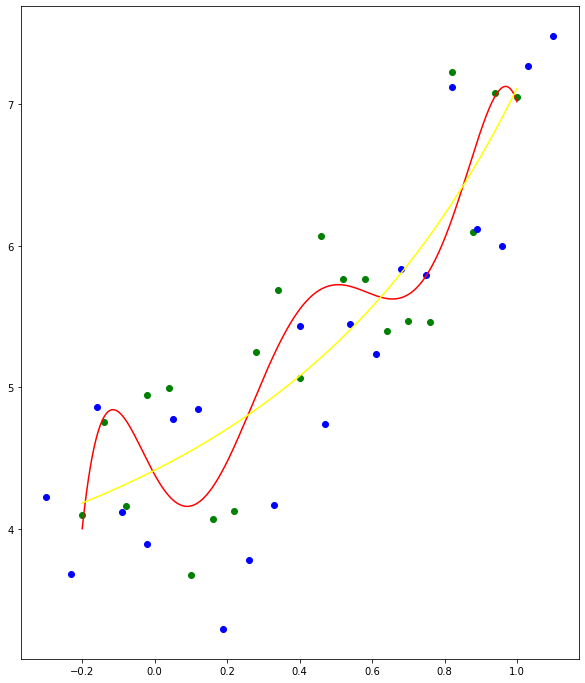

In [31]:
plt.figure(figsize=(10, 12)) #рисуемммм
plt.plot(X_train, y_train,'ro', color='green') #наносим точки
plt.plot(X_test, y_test,'ro', color='blue') #наносим точки
result = []
X_temp = np.linspace(-0.2, 1, 1000)
for k in range(1, 7):
    X = make_X(X_temp, k)
    caef = make_caef(k)
    result.append(X.dot(caef))
plt.plot(X_temp, result[5], color='red') #без
coef = make_caef__(make_m(6, (X_train.reshape(1, len(X_train))).T), 0.3)
X = make_m(6, X_temp)
plt.plot(X_temp, X.dot(coef), color='yellow') #c

График модели с регуляризацией более плавный, значит, модель не так сильно переобучается, как модель без регуляризации.